# **BLACK-SCHOLES MODEL**
[Black-Scholes model basics](https://www.investopedia.com/terms/b/blackscholes.asp)

**IMPORTING THE LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import date

import warnings
warnings.filterwarnings("ignore")

# to fetch data
import yfinance as yf

import scipy.stats as ss

**IMPORTING DATA**

In [ ]:
symbol = 'TSLA'
end = date.today()
start = end.replace(year = 2022)

tickerData = yf.Ticker(symbol)

# Read data
df = tickerData.history(period='1d', start=start, end=end, interval = '1d')


df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-20 00:00:00-05:00,256.410004,259.839996,247.000000,247.139999,125097000,0.0,0.0
2023-12-21 00:00:00-05:00,251.899994,254.800003,248.550003,254.500000,109594200,0.0,0.0
2023-12-22 00:00:00-05:00,256.760010,258.220001,251.369995,252.539993,93249800,0.0,0.0
2023-12-26 00:00:00-05:00,254.490005,257.970001,252.910004,256.609985,86892400,0.0,0.0
2023-12-27 00:00:00-05:00,258.350006,263.339996,257.519989,261.440002,106171300,0.0,0.0


In [ ]:
symbol = 'TSLA'  #the ticker of the stock whose data is to be taken out
dfo = yf.Ticker(symbol)

In [ ]:
dfo.options  #to get the date of different expiration time

('2023-12-29',
 '2024-01-05',
 '2024-01-12',
 '2024-01-19',
 '2024-01-26',
 '2024-02-02',
 '2024-02-16',
 '2024-03-15',
 '2024-04-19',
 '2024-05-17',
 '2024-06-21',
 '2024-07-19',
 '2024-09-20',
 '2025-01-17',
 '2025-06-20',
 '2025-09-19',
 '2025-12-19',
 '2026-01-16')

In [ ]:
dfo_exp = dfo.option_chain(dfo.options[1])  #you can change index to try on different expiry dates

In [ ]:
dfo_exp.calls.head() #data for call options

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,TSLA240105C00020000,2023-12-19 19:46:51+00:00,20.0,236.55,240.90,241.65,0.0,0.0,1.0,2,9.236332,True,REGULAR,USD
1,TSLA240105C00030000,2023-12-26 20:35:27+00:00,30.0,227.34,230.95,231.65,0.0,0.0,44.0,47,7.673829,True,REGULAR,USD
2,TSLA240105C00040000,2023-12-22 17:25:54+00:00,40.0,215.57,220.90,222.10,0.0,0.0,4.0,0,6.783205,True,REGULAR,USD
3,TSLA240105C00070000,2023-12-21 15:47:05+00:00,70.0,181.00,190.90,191.70,0.0,0.0,NaN,0,4.651371,True,REGULAR,USD
4,TSLA240105C00080000,2023-12-27 18:03:25+00:00,80.0,182.32,181.15,181.70,0.0,0.0,1.0,6,4.272466,True,REGULAR,USD


# **CALCULATION OF ANNUAL VOLATALITY**
Annual volatility of the stock can be calculated as:

Calculating daily logarithmic returns

Then calculating its standard deviation to get daily volatility

Then multiplying it by sqrt(252) as there are 252 trading days in a year.

In [ ]:
def annual_vol(df):
    """
    Function to calculate annual volatility

    Parameters
    ----------
    df : dataframe
         Stock info

    Returns
    -------
    vol : float
        annual volatility of the stock
    """

    log_return = np.log(df['Close']) - np.log(df['Close'].shift(1))
    log_return = log_return[1:]
    daily_vol = log_return.std()
    vol = daily_vol*(252**0.5)

    return vol

In [ ]:
vol = annual_vol(df)
vol

0.5434929333502176

# **BLACK-SCHOLES MODEL**


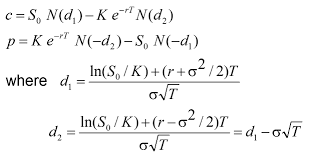

C : call option price

P : Put option price

S : Stock price

K : Strike price

r : risk free rate

t : time of maturity in year

N = Normal distribution

In [ ]:
def euro_vanilla(S, K, T, r, sigma, option = 'call'):
    """
    To calculate options price with the help of black-scholes model

    Parameters
    ----------
    S : float
        The price of the underlying

    K : float
        Strike price of the option

    T : float
        Time to expiry in years

    r : float
        Risk free rate which can be taken as the US Treasury bond yield

    sigma : float
        The annual volatility of the returns

    option : string
        call for call option
        put for put option

    Returns
    -------
    premium : float
        The price of call or put option
    """


    d1 = (np.log(S/K) + (r + sigma**2 / 2) * T)/(sigma * np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)

    if option == 'call':
        premium = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
    if option == 'put':
        premium =  K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)

    return premium

In [ ]:
N = 100
T = 8.0/365      #Calculate the number of days left for expiry from your calculation in years
t = T/N

In [ ]:
#r is the risk free rate taken from the 10 years us treasury bond
#call price calculated from black scholes model
call = {}
for K in dfo_exp.calls['strike']:
    call_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0123*t, sigma=vol)
  # print(call_price)
    call[K] = call_price
th_call = pd.DataFrame.from_dict(call, orient='index')
th_call.rename(columns = {0:"th_call"}, inplace = True)
th_call.head()

,th_call
20.0,241.440004
30.0,231.440004
40.0,221.440005
70.0,191.440007
80.0,181.440007


In [ ]:
#actual call price
ac_call = dfo_exp.calls.loc[:, ['strike', 'lastPrice']]
ac_call.set_index('strike', inplace = True)
ac_call.rename(columns = {"lastPrice":"ac_call"}, inplace=True)
ac_call.head()

,ac_call
strike,
20.0,236.55
30.0,227.34
40.0,215.57
70.0,181.00
80.0,182.32


In [ ]:
call = th_call
call["ac_call"] = ac_call
call.head(10)

,th_call,ac_call
20.0,241.440004,236.55
30.0,231.440004,227.34
40.0,221.440005,215.57
70.0,191.440007,181.00
80.0,181.440007,182.32
90.0,171.440008,165.81
100.0,161.440008,156.12
105.0,156.440009,147.47
110.0,151.440009,142.25
115.0,146.440009,136.23


<Axes: >

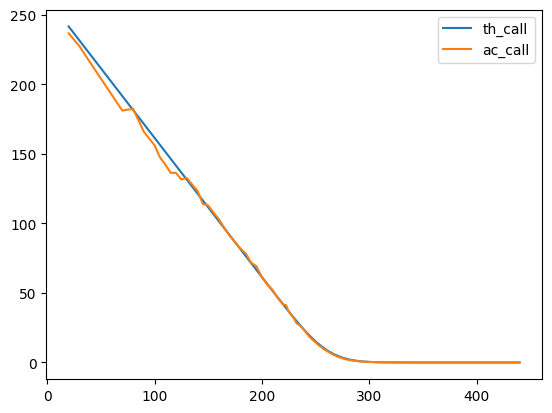

In [ ]:
call.plot() #plotting the actual and theoretical call prices

In [ ]:
#r is the risk free rate taken from the 10 years us treasury bond
#theoretical put price calculated from black scholes model
put = {}
for K in dfo_exp.puts['strike']:
    put_price = euro_vanilla(S = df['Close'][len(df)-1], K = K, T = T, r=0.0158*t, sigma=vol, option = 'put')
  # print(put_price)
    put[K] = put_price
th_put = pd.DataFrame.from_dict(put, orient='index')
th_put.rename(columns = {0:"th_put"}, inplace = True)
th_put.head()

,th_put
20.0,5.523024e-225
50.0,1.438301e-94
60.0,2.596021e-75
70.0,9.243088e-61
80.0,1.957582e-49


In [ ]:
#actual put price
ac_put = dfo_exp.puts.loc[:, ['strike', 'lastPrice']]
ac_put.set_index('strike', inplace = True)
ac_put.rename(columns = {"lastPrice":"ac_put"}, inplace=True)
ac_put.head()

,ac_put
strike,
20.0,0.01
50.0,0.01
60.0,0.02
70.0,0.01
80.0,0.01


In [ ]:
put = th_put
put["ac_put"] = ac_put
put.tail(10)

,th_put,ac_put
320.0,58.604889,64.00
325.0,63.584447,66.50
335.0,73.566777,85.51
340.0,78.563449,104.10
345.0,83.561714,112.49
350.0,88.560828,115.56
405.0,143.559967,157.00
410.0,148.559966,157.94
420.0,158.559966,182.95
425.0,163.559965,172.41


<Axes: >

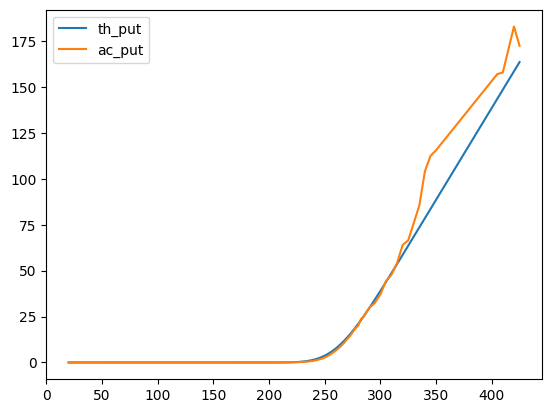

In [ ]:
put.plot()